<a href="https://colab.research.google.com/github/Owino-Paul/Learn_Git/blob/master/Nigeria_Economy_kpis_1990_2023_Pandas_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# upload a dataset
from google.colab import files
uploaded = files.upload()

In [59]:
# load data
df = pd.read_csv('/content/Nigeria economy kpis.csv')
pd.set_option('display.max_colwidth', 50)
df.head()

,Year,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,Leadership
0,1990,0.0740,0.056,0.717,3464.72,11148.10,6849.92,Sani Abacha
1,1991,0.1301,0.041,0.750,3590.84,10910.56,7038.21,Sani Abacha
2,1992,0.4460,0.041,0.702,3674.79,11578.98,7283.32,Sani Abacha
3,1993,0.5720,0.041,0.710,3743.67,10790.31,7544.10,Sani Abacha
4,1994,0.5703,0.041,0.559,3839.68,10151.70,7685.48,Sani Abacha


## 2. Read the metadata / general information

In [60]:
# read general info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             34 non-null     int64  
 1   Inflation rate   34 non-null     float64
 2   Unemployment     34 non-null     float64
 3   Government debt  34 non-null     float64
 4   Agriculture      34 non-null     float64
 5   Industry         34 non-null     float64
 6   Services         34 non-null     float64
 7   Leadership       34 non-null     object 
dtypes: float64(6), int64(1), object(1)
memory usage: 2.3+ KB


## 3. Perform some descriptive analysis on our data

In [61]:
# Describe the data
df.describe(include='all')

,Year,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,Leadership
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sani Abacha
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
mean,2006.500000,0.180641,0.099421,0.338647,10168.294118,12804.397647,20523.631765,NaN
std,9.958246,0.158712,0.108130,0.203102,5613.250422,2620.145710,12487.795389,NaN
min,1990.000000,0.054000,0.038000,0.073000,3464.720000,3735.980000,6849.920000,NaN
25%,1998.250000,0.094250,0.039250,0.184500,4348.070000,10923.630000,8800.472500,NaN
50%,2006.500000,0.129550,0.041000,0.284500,9869.730000,13145.090000,16195.390000,NaN
75%,2014.750000,0.172250,0.097500,0.430000,15222.922500,14944.827500,34469.112500,NaN


## 4. Rename columns

In [62]:
#. Review columns
print(list(df.columns))

['Year', 'Inflation rate', 'Unemployment', 'Government debt', 'Agriculture', 'Industry', 'Services', 'Leadership']


In [63]:
# Rename columns
df.rename(columns={'Unemployment' : 'Unemployment Rate (%)',
                   'Government debt' : 'Government Debt Rate (%)',
                   'Agriculture' : 'Agriculture GDP (Naira)',
                   'Industry' : 'Industry GDP (Naira)',
                   'Services' : 'Services GDP (Naira)',
                   'Leadership' : 'Presidents',
                   'Inflation rate' : 'Inflation Rate (%)'
                   }, inplace=True)

df.head()

,Year,Inflation Rate (%),Unemployment Rate (%),Government Debt Rate (%),Agriculture GDP (Naira),Industry GDP (Naira),Services GDP (Naira),Presidents
0,1990,0.0740,0.056,0.717,3464.72,11148.10,6849.92,Sani Abacha
1,1991,0.1301,0.041,0.750,3590.84,10910.56,7038.21,Sani Abacha
2,1992,0.4460,0.041,0.702,3674.79,11578.98,7283.32,Sani Abacha
3,1993,0.5720,0.041,0.710,3743.67,10790.31,7544.10,Sani Abacha
4,1994,0.5703,0.041,0.559,3839.68,10151.70,7685.48,Sani Abacha


# 5. Perfroming transformation on columns

In [64]:
#. Transform inflation rate, unemployement rate and government debt rate into percentage %
df['Inflation Rate (%)'] = df['Inflation Rate (%)'].apply(lambda l: l*100)
df['Unemployment Rate (%)'] = df['Unemployment Rate (%)'].apply(lambda l: l*100)
df['Government Debt Rate (%)'] = df['Government Debt Rate (%)'].apply(lambda l: l*100)
df.head()

,Year,Inflation Rate (%),Unemployment Rate (%),Government Debt Rate (%),Agriculture GDP (Naira),Industry GDP (Naira),Services GDP (Naira),Presidents
0,1990,7.40,5.6,71.7,3464.72,11148.10,6849.92,Sani Abacha
1,1991,13.01,4.1,75.0,3590.84,10910.56,7038.21,Sani Abacha
2,1992,44.60,4.1,70.2,3674.79,11578.98,7283.32,Sani Abacha
3,1993,57.20,4.1,71.0,3743.67,10790.31,7544.10,Sani Abacha
4,1994,57.03,4.1,55.9,3839.68,10151.70,7685.48,Sani Abacha


## 6. Apply Basic Filter for more modifications

In [65]:
# Checking for Presidents (unique)
# version I
df['Presidents'].unique()


array(['Sani Abacha', 'Olusegun Obasanjo', "Musa Yar'Adua",
       'Goodluck Ebele Jonathan', 'Buhari'], dtype=object)

In [66]:
# version II
unique_presidents = df['Presidents'].unique()
print(unique_presidents)

['Sani Abacha' 'Olusegun Obasanjo' "Musa Yar'Adua"
 'Goodluck Ebele Jonathan' 'Buhari']


In [67]:
# Time in office for a specific presidnent
df.loc[df['Presidents'] == 'Olusegun Obasanjo']

,Year,Inflation Rate (%),Unemployment Rate (%),Government Debt Rate (%),Agriculture GDP (Naira),Industry GDP (Naira),Services GDP (Naira),Presidents
9,1999,6.6,4.0,64.9,4703.64,10201.81,9062.14,Olusegun Obasanjo
10,2000,6.9,4.0,57.6,4840.97,10962.84,9365.72,Olusegun Obasanjo
11,2001,18.9,3.9,53.1,5024.54,11576.32,10057.76,Olusegun Obasanjo
12,2002,12.9,3.9,43.3,7817.08,11725.42,11202.68,Olusegun Obasanjo
13,2003,14.0,3.9,42.1,8364.83,13151.23,11488.74,Olusegun Obasanjo
14,2004,15.0,3.9,35.5,8888.57,13382.86,13786.30,Olusegun Obasanjo
15,2005,17.9,3.9,18.9,9516.99,13609.76,15252.04,Olusegun Obasanjo
16,2006,8.2,3.9,9.4,10222.47,13342.47,17138.74,Olusegun Obasanjo
17,2007,5.4,3.8,8.1,10958.47,13085.27,19342.14,Olusegun Obasanjo


In [68]:
df.loc[df['Presidents'] == 'Sani Abacha']

,Year,Inflation Rate (%),Unemployment Rate (%),Government Debt Rate (%),Agriculture GDP (Naira),Industry GDP (Naira),Services GDP (Naira),Presidents
0,1990,7.40,5.6,71.7,3464.72,11148.10,6849.92,Sani Abacha
1,1991,13.01,4.1,75.0,3590.84,10910.56,7038.21,Sani Abacha
2,1992,44.60,4.1,70.2,3674.79,11578.98,7283.32,Sani Abacha
3,1993,57.20,4.1,71.0,3743.67,10790.31,7544.10,Sani Abacha
4,1994,57.03,4.1,55.9,3839.68,10151.70,7685.48,Sani Abacha
5,1995,72.84,4.1,34.0,3977.38,9845.97,7837.13,Sani Abacha
6,1996,29.30,4.0,25.2,4133.55,10402.19,8033.13,Sani Abacha
7,1997,10.70,4.0,24.1,4305.68,10599.70,8325.74,Sani Abacha
8,1998,7.90,4.0,22.3,4475.24,10641.26,8713.25,Sani Abacha


In [69]:
df.loc[df['Presidents'] == "Musa Yar'Adua"]

,Year,Inflation Rate (%),Unemployment Rate (%),Government Debt Rate (%),Agriculture GDP (Naira),Industry GDP (Naira),Services GDP (Naira),Presidents
18,2008,11.6,3.8,7.3,11645.37,12817.79,21856.86,Musa Yar'Adua
19,2009,12.5,3.8,8.6,12330.33,13138.95,24573.09,Musa Yar'Adua
20,2010,13.7,5.1,9.4,13048.89,13826.43,27736.94,Musa Yar'Adua


In [70]:
df.loc[df['Presidents'] == 'Goodluck Ebele Jonathan']

,Year,Inflation Rate (%),Unemployment Rate (%),Government Debt Rate (%),Agriculture GDP (Naira),Industry GDP (Naira),Services GDP (Naira),Presidents
21,2011,10.8,6.0,17.4,13429.38,14986.62,29095.04,Goodluck Ebele Jonathan
22,2012,12.2,10.6,17.6,14329.71,15350.45,30249.74,Goodluck Ebele Jonathan
23,2013,8.5,10.0,18.3,14750.52,15682.46,32785.73,Goodluck Ebele Jonathan
24,2014,8.0,7.8,17.5,15380.39,16742.15,35030.24,Goodluck Ebele Jonathan
25,2015,9.0,9.0,20.3,15952.22,16366.66,36705.05,Goodluck Ebele Jonathan


In [71]:
df.loc[df['Presidents'] == 'Buhari']

,Year,Inflation Rate (%),Unemployment Rate (%),Government Debt Rate (%),Agriculture GDP (Naira),Industry GDP (Naira),Services GDP (Naira),Presidents
26,2016,15.7,13.40,23.4,16607.34,14918.15,36405.75,Buhari
27,2017,16.5,17.50,25.3,17179.50,15238.28,36073.21,Buhari
28,2018,12.1,22.60,27.7,17544.15,15523.43,36732.37,Buhari
29,2019,11.4,8.53,29.2,17958.58,15882.35,37546.90,Buhari
30,2020,13.2,33.30,34.5,18348.18,14953.72,36712.48,Buhari
31,2021,17.0,35.00,36.6,18738.41,14883.77,38771.49,Buhari
32,2022,18.9,37.70,37.4,19091.07,14195.58,41352.81,Buhari
33,2023,17.3,40.60,38.6,3844.85,3735.98,10169.24,Buhari


In [72]:
for presidents in unique_presidents:
  result = df.loc[df['Presidents'] == presidents]
  print(f'\nRecords for {presidents}\n')
  print(result.to_string(index=False))


Records for Sani Abacha

 Year  Inflation Rate (%)  Unemployment Rate (%)  Government Debt Rate (%)  Agriculture GDP (Naira)  Industry GDP (Naira)  Services GDP (Naira)  Presidents
 1990                7.40                    5.6                      71.7                  3464.72              11148.10               6849.92 Sani Abacha
 1991               13.01                    4.1                      75.0                  3590.84              10910.56               7038.21 Sani Abacha
 1992               44.60                    4.1                      70.2                  3674.79              11578.98               7283.32 Sani Abacha
 1993               57.20                    4.1                      71.0                  3743.67              10790.31               7544.10 Sani Abacha
 1994               57.03                    4.1                      55.9                  3839.68              10151.70               7685.48 Sani Abacha
 1995               72.84             

In [77]:
# checking for year with highest inflation rate
df.loc[df['Inflation Rate (%)'] == df['Inflation Rate (%)'].max()]

,Year,Inflation Rate (%),Unemployment Rate (%),Government Debt Rate (%),Agriculture GDP (Naira),Industry GDP (Naira),Services GDP (Naira),Presidents
5,1995,72.84,4.1,34.0,3977.38,9845.97,7837.13,Sani Abacha


In [76]:
# Find the year with the highest inflation rate
highest_inflation_year = df.loc[df['Inflation Rate (%)'] == df['Inflation Rate (%)'].max(), 'Year'].values[0]
print(f"The year with the highest inflation rate is: {highest_inflation_year}")
highest_inflation_by_president = df.groupby('Presidents')['Inflation Rate (%)'].max()

# Print the results
print("\nHighest inflation rate for each president:")
print(highest_inflation_by_president)

The year with the highest inflation rate is: 1995

Highest inflation rate for each president:
Presidents
Buhari                     18.90
Goodluck Ebele Jonathan    12.20
Musa Yar'Adua              13.70
Olusegun Obasanjo          18.90
Sani Abacha                72.84
Name: Inflation Rate (%), dtype: float64


In [78]:
# checking for year with lowest inflation rate
df.loc[df['Inflation Rate (%)'] == df['Inflation Rate (%)'].min()]

,Year,Inflation Rate (%),Unemployment Rate (%),Government Debt Rate (%),Agriculture GDP (Naira),Industry GDP (Naira),Services GDP (Naira),Presidents
17,2007,5.4,3.8,8.1,10958.47,13085.27,19342.14,Olusegun Obasanjo


In [79]:
# Find the year with the lowest inflation rate
lowest_inflation_year = df.loc[df['Inflation Rate (%)'] == df['Inflation Rate (%)'].min(), 'Year'].values[0]
print(f"The year with the highest inflation rate is: {lowest_inflation_year}")
lowest_inflation_by_president = df.groupby('Presidents')['Inflation Rate (%)'].min()
print("\nLowest inflation rate for each president:")
print(lowest_inflation_by_president)

The year with the highest inflation rate is: 2007

Lowest inflation rate for each president:
Presidents
Buhari                     11.4
Goodluck Ebele Jonathan     8.0
Musa Yar'Adua              11.6
Olusegun Obasanjo           5.4
Sani Abacha                 7.4
Name: Inflation Rate (%), dtype: float64


In [81]:
# Cheking for presidents with the highest impact on Unemployement during their terms
df.groupby('Presidents')[['Inflation Rate (%)','Unemployment Rate (%)', 'Government Debt Rate (%)']].max()

,Inflation Rate (%),Unemployment Rate (%),Government Debt Rate (%)
Presidents,,,
Buhari,18.90,40.6,38.6
Goodluck Ebele Jonathan,12.20,10.6,20.3
Musa Yar'Adua,13.70,5.1,9.4
Olusegun Obasanjo,18.90,4.0,64.9
Sani Abacha,72.84,5.6,75.0


In [82]:
# Cheking for presidents with the highest impact on Unemployement during their terms
df.groupby('Presidents')[['Inflation Rate (%)','Unemployment Rate (%)', 'Government Debt Rate (%)']].mean()

,Inflation Rate (%),Unemployment Rate (%),Government Debt Rate (%)
Presidents,,,
Buhari,15.262500,26.078750,31.587500
Goodluck Ebele Jonathan,9.700000,8.680000,18.220000
Musa Yar'Adua,12.600000,4.233333,8.433333
Olusegun Obasanjo,11.755556,3.911111,36.988889
Sani Abacha,33.331111,4.233333,49.933333


## Visualizations
1. Unmploment Rate

In [85]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


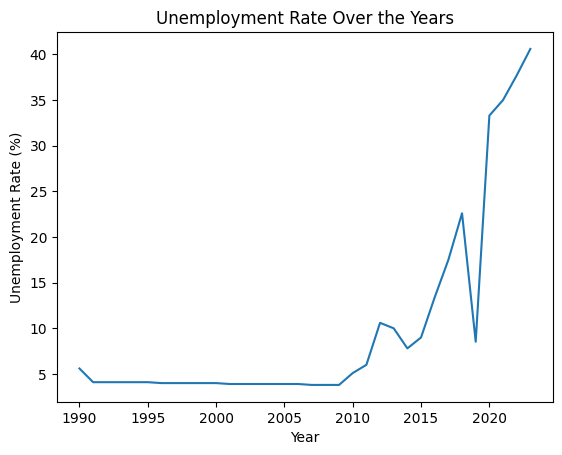

In [89]:
# Visualize to see unemployment over the years
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over the Years')
df.groupby('Year')['Unemployment Rate (%)'].mean().plot();

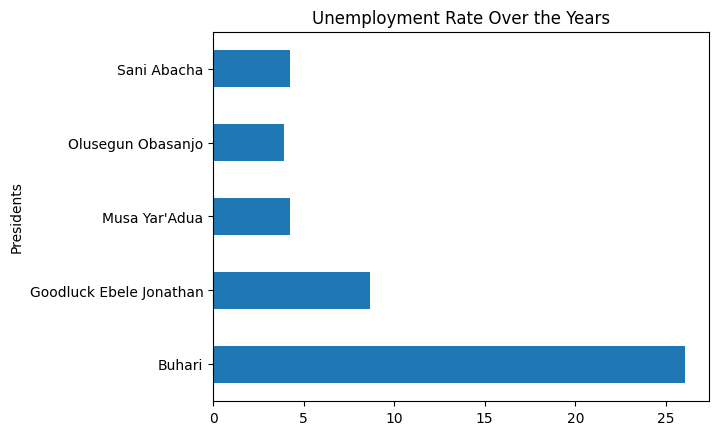

In [90]:
# Visualize to see unemployment over the years
plt.xlabel('Presidents')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over the Years')
df.groupby('Presidents')['Unemployment Rate (%)'].mean().plot(kind='barh');

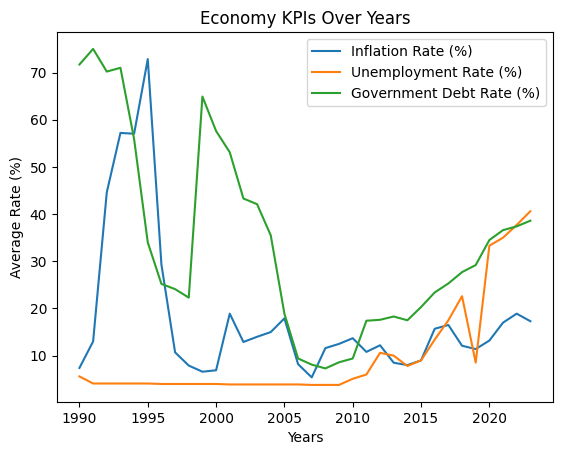

In [99]:
# Comparing inflation rate, unemployement rate and government debt line graph
df.groupby('Year')[['Inflation Rate (%)','Unemployment Rate (%)', 'Government Debt Rate (%)']].mean().plot()

plt.xlabel('Years')
plt.ylabel('Average Rate (%)')
plt.title('Economy KPIs Over Years');

In [104]:
# Creating an interarctive line graph for comparison
gf_df = df.groupby('Year')[['Inflation Rate (%)','Unemployment Rate (%)', 'Government Debt Rate (%)']].mean().reset_index()
fig = px.line (gf_df,
               x= 'Year',
               y= ['Inflation Rate (%)','Unemployment Rate (%)', 'Government Debt Rate (%)'],
               title= 'Economy KPIs Over Years')
fig.show();

In [105]:
# Create Inflaration rate percentage Change
df['Inflation Rate Change'] = df['Inflation Rate (%)'].diff()
df.head()

,Year,Inflation Rate (%),Unemployment Rate (%),Government Debt Rate (%),Agriculture GDP (Naira),Industry GDP (Naira),Services GDP (Naira),Presidents,Inflation Rate Change
0,1990,7.40,5.6,71.7,3464.72,11148.10,6849.92,Sani Abacha,NaN
1,1991,13.01,4.1,75.0,3590.84,10910.56,7038.21,Sani Abacha,5.61
2,1992,44.60,4.1,70.2,3674.79,11578.98,7283.32,Sani Abacha,31.59
3,1993,57.20,4.1,71.0,3743.67,10790.31,7544.10,Sani Abacha,12.60
4,1994,57.03,4.1,55.9,3839.68,10151.70,7685.48,Sani Abacha,-0.17


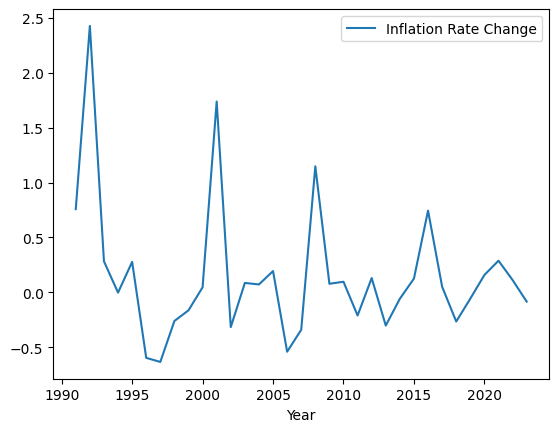

In [110]:
# Line graph for percentage change
df['Inflation Rate Change'] = df['Inflation Rate (%)'].pct_change()
#plot the change
df.plot(x='Year', y='Inflation Rate Change', kind='line');

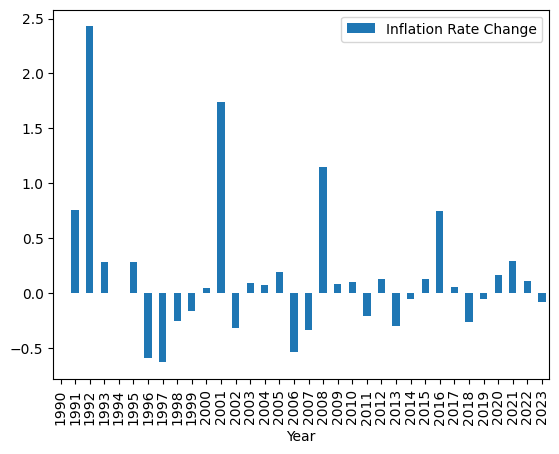

In [111]:
# Bar Graph graph for percentage change
df['Inflation Rate Change'] = df['Inflation Rate (%)'].pct_change()
#plot the change
df.plot(x='Year', y='Inflation Rate Change', kind='bar');